**Импорт библиотек**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.linear_model import LinearRegression
import morethemes as mt # https://josephbarbierdarnal.github.io/morethemes/#__tabbed_1_2
mt.set_theme("minimal")
%config InlineBackend.figure_format = 'svg'

**Загружаем датафрейм**

In [39]:
df = sns.load_dataset('penguins').dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


**Создаём сетку графиков**

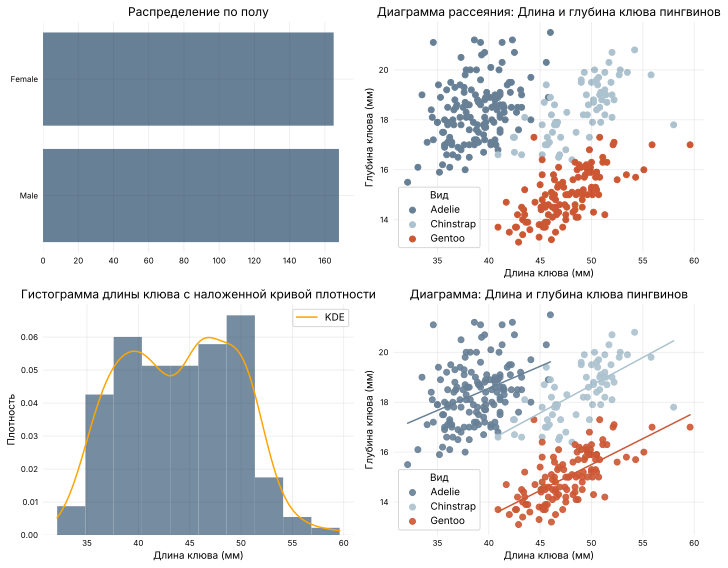

In [40]:
# Создаем фигуру и подграфики (2x2)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Первый график 
axs[0, 0].barh(df['sex'].value_counts().index, df['sex'].value_counts().values)
axs[0, 0].set_title('Распределение по полу')

# Второй график
# Задаем цвета для каждого вида
colors = {
    'Adelie': 'blue',
    'Chinstrap': 'orange',
    'Gentoo': 'red'
}
for species in colors.keys():
    subset = df[df['species'] == species]
    axs[0, 1].scatter(subset['bill_length_mm'], subset['bill_depth_mm'], 
                label=species)
# Добавляем заголовок и подписи осей
axs[0, 1].set_title('Диаграмма рассеяния: Длина и глубина клюва пингвинов')
axs[0, 1].set_xlabel('Длина клюва (мм)')
axs[0, 1].set_ylabel('Глубина клюва (мм)')
axs[0, 1].legend(title='Вид')

# Третий график
# Строим гистограмму
axs[1, 0].hist(df['bill_length_mm'], bins=10, density=True, alpha=0.9)
# Вычисляем и строим KDE
kde = gaussian_kde(df['bill_length_mm'])
x = np.linspace(df['bill_length_mm'].min(), df['bill_length_mm'].max(), 100)
axs[1, 0].plot(x, kde(x), color='orange', label='KDE')
# Добавляем заголовок и подписи осей
axs[1, 0].set_title('Гистограмма длины клюва с наложенной кривой плотности')
axs[1, 0].set_xlabel('Длина клюва (мм)')
axs[1, 0].set_ylabel('Плотность')
axs[1, 0].legend()

# Четвертый график
# Уникальные виды пингвинов
species = df['species'].unique()
for i, sp in enumerate(species):
    subset = df[df['species'] == sp] 
    
    # Распределяем точки
    axs[1, 1].scatter(subset['bill_length_mm'], subset['bill_depth_mm'], 
                label=sp, alpha=0.9)

    # Линейная регрессия
    X = subset['bill_length_mm'].values.reshape(-1, 1)
    y = subset['bill_depth_mm'].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Добавляем линию регрессии
    axs[1, 1].plot(subset['bill_length_mm'], y_pred)

axs[1, 1].set_title('Диаграмма: Длина и глубина клюва пингвинов')
axs[1, 1].set_xlabel('Длина клюва (мм)')
axs[1, 1].set_ylabel('Глубина клюва (мм)')
axs[1, 1].legend(title='Вид')

# Настройка общего пространства между графиками
plt.tight_layout()

# Показать графики
plt.show()